<a href="https://colab.research.google.com/github/awildt01/Predicting-Churn/blob/main/churn_de.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://elevatex.de/de/blog/it/churn-modeling-eine-detaillierte-schritt-fur-schritt-anleitung-in-python/

https://www.kaggle.com/code/bhartiprasad17/customer-churn-prediction


https://www.kaggle.com/code/bandiatindra/telecom-churn-prediction

# Churn Prediction

In einer allgemeineren Definition ist *Churn* eine Kennzahl, die die Anzahl der Kunden angibt, die  in einem bestimmten Zeitraum kündigen . Um die Abwanderung zu berechnen, müssen Sie lediglich die Anzahl der Kunden addieren, die Ihr Produkt/Ihre Dienstleistung im analysierten Zeitraum gekündigt haben.

//
<p align=center>
<img src="https://vanessamiranda.github.io/images/Customerchurn/customerchurn.jpg" width="60%"></p>



Die Abwanderungsrate wird im Allgemeinen über einen bestimmten Zeitraum berechnet, sei es jährlich, halbjährlich oder monatlich. Beispiel: Wenn jeden Monat einer von 20 Kunden Ihr Produkt kündigt, bedeutet dies, dass die Abwanderungsrate für Ihr Produkt 5 % beträgt.
Sie können auch die Abwanderungsrate, die den Prozentsatz der Konten darstellt, die gekündigt werden, im Vergleich zum aktiven Kundenstamm wie folgt berechnen:

**Abwanderungsrate : Gesamtzahl gekündigter Kunden / Gesamtzahl aktiver Kunden im letzten Monat**

Die Kundenabwanderung wirkt sich auf die Rentabilität aus, besonders in Branchen, in denen die Einnahmen stark von Abonnements abhängig sind (z. B. Banken, Telefon- und Internetdienstanbieter, Pay-TV-Unternehmen, Versicherungsunternehmen usw.). Es wird geschätzt, dass die Gewinnung eines neuen Kunden bis zu fünfmal mehr kosten kann, als die Bindung eines bestehenden Kunden. Daher ist die Kundenabwanderungsanalyse unerlässlich für ein Unternehmen. Das Ziel dieses Projektes ist es, die Churn für eine Unternehmen zu verstehen und vorherzusagen.

Das Ziel der Churn Prediction ist es, diese abwanderungsgefährdeten Kunden zu identifizieren, bevor sie das Unternehmen verlassen, und präventive Maßnahmen zu ergreifen, um sie zu halten. Dies kann bedeutsam sein, da die Neukundengewinnung oft teurer ist als die Bindung bestehender Kunden.

## Datenbeschaffung

Das Datenmodul stammenn aus der DataIBM Business Analytics und ist ein Beispiel als Telco Customer Churn. Die Kundenabwanderungsdaten von Telekommunikationsunternehmen enthalten Informationen über ein fiktives Telekommunikationsunternehmen, das im dritten Quartal 7043 Kunden in Kalifornien Telefon- und Internetdienste zu Hause bereitgestellt hat. Es zeigt an, welche Kunden ihren Service verlassen, geblieben oder sich für ihn angemeldet haben. Für jeden Kunden sind mehrere wichtige Daten sowie ein Zufriedenheitswert, ein Abwanderungswert und ein CLTV-Index (Customer Lifetime Value) enthalten.

* *Website [neste link](https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113).*



### Die Herausforderung der Analyse

Eine der Haupt Herausforderungen besteht darin, genaue Vorhersagen darüber zu treffen, welche Kunden wahrscheinlich abwandern werden. Dies erfordert eine gründliche Analyse einer Vielzahl von Daten, die das Kundenverhalten und die Interaktionen mit dem Unternehmen beschreiben. Jedoch können Datenqualität und -quantität eine Herausforderung darstellen, da Unternehmen möglicherweise nicht über ausreichende oder qualitativ hochwertige Daten verfügen, um präzise Vorhersagen zu treffen.

Ein weiteres Problem ist die Bewältigung von unbalancierten Daten, da die Anzahl der abwandernden Kunden oft viel kleiner ist als die Anzahl der nicht abwandernden Kunden. Dies kann zu Verzerrungen führen und die Leistung des Modells beeinträchtigen. Es ist wichtig, Techniken zur Bewältigung von unbalancierten Daten anzuwenden, um genaue Vorhersagen zu gewährleisten.

Zusätzlich können komplexe Kundenverhaltensmuster und Wechselwirkungen zwischen verschiedenen Merkmalen eine Herausforderung darstellen. Das Identifizieren relevanter Merkmale und das Verständnis ihrer Auswirkungen auf das Churn-Verhalten erfordert oft Fachkenntnisse und fortgeschrittene Analysetechniken.

Die Vorhersagegenauigkeit ist ein weiteres Anliegen, da Vorhersagemodelle oft Overfitting oder Underfitting zeigen können. Overfitting tritt auf, wenn das Modell zu stark an die Trainingsdaten angepasst ist und nicht in der Lage ist, auf neuen Daten gut zu generalisieren. Underfitting hingegen tritt auf, wenn das Modell zu einfach ist und nicht in der Lage ist, die zugrunde liegenden Muster der Daten zu erfassen.

Datenschutz und Datenschutz sind ebenfalls wichtige Aspekte bei der Churn-Analyse, da sie den Umgang mit sensiblen Kundeninformationen betreffen. Es ist entscheidend sicherzustellen, dass alle Datenschutzbestimmungen eingehalten werden und dass Kundeninformationen sicher und vertraulich behandelt werden.

Trotz dieser Herausforderungen bietet die Churn-Analyse Unternehmen die Möglichkeit, Kundenbeziehungen zu stärken und langfristige Kundenloyalität aufzubauen. Durch den Einsatz fortgeschrittener Analysetechniken und die Berücksichtigung von Datenschutzbestimmungen können Unternehmen präzise Vorhersagen treffen und wirksame Strategien zur Kundenbindung entwickeln.

### Wörterbuch der Variablen
* *dicionário de variáveis.*
    * *Die Beschreibung der Spaltennamen [neste link](https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113).*


**customerID** **->** Customer ID.

**gender** **->** Whether the customer is a male or a female.

**SeniorCitizen** **->** Indicates if the customer is 65 (1, 0).

**Partner** **->** Whether the customer has a partner or not (Yes, No).

**Dependents** **->** Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.

**tenure** **->** Number of months the customer has stayed with the company

**PhoneService**  **->** Whether the customer has a phone service or not (Yes, No).

**MultipleLines** **->** Indicates if the customer subscribes to multiple telephone lines with the company: (Yes, No, No phone service).

**InternetService**  **->** Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.

**OnlineSecurity**  **->** Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No.

**OnlineBackup**  **->** Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No.

**DeviceProtection**  **->** Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company:Yes, No.

**TechSupport**  **->** Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No

**StreamingTV**  **->**  Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.

**StreamingMovies**  **->** Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.

**Contract**  **->** Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.

**PaperlessBilling**  **->** Indicates if the customer has chosen paperless billing: Yes, No.

**PaymentMethod**  **->** Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check.

**MonthlyCharges**  **->** Indicates the customer’s current total monthly charge for all their services from the company.

**TotalCharges**  **->** Indicates the customer’s total charges, calculated to the end of the quarter specified above.

**Churn**  **->** Churn






In [4]:
# importar os pacotes necessários
# !pip install bar_chart_race -q
# !pip install plotly

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import bokeh.io
import bokeh.plotting
from bokeh.io import show, output_file
from bokeh.models import ColumnDataSource, FactorRange
from bokeh.plotting import figure, show
from bokeh.transform import factor_cmap
from bokeh.models import Range1d
from bokeh.models import LabelSet

# para não limitar a visualização do número de colunas
pd.set_option('display.max_columns', None)

# renderers
import plotly.io as pio
pio.renderers.default = 'colab'

sns.set_style()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# importar os dados
DATA_PATH = "https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(DATA_PATH)

In [5]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [6]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [7]:
print("Linhas:\t\t{}".format(df.shape[0]))
print("Colunas:\t{}".format(df.shape[1]))

Linhas:		7043
Colunas:	21


#  Data Manipulation

Um dieses Projekt zu beginnen, werde ich die Integrität und die Nutzbarkeit des Datensatzes überprüfen.

Dazu werde ich die Anzahl der fehlenden Daten, die Namen der Spalten, die Variablentypen pro Spalte und die eindeutigen Werte pro Spalte ausdrucken. Letzteres wird insbesondere bei der Identifizierung potenziell kategorischer Variablen helfen.

In [8]:
print("fehlenden Daten (total):\t{}\n".format(df.isnull().sum().values.sum()))
print(df.isnull().sum() / df.shape[0])
print("\nName features:\n{}\n".format(df.columns.values))
print("Eindeutigen Werte (pro Spalte):\n{}\n".format(df.nunique()))
print("Variablentypen (pro Spalte)\n{}".format(df.dtypes))

fehlenden Daten (total):	0

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

Name features:
['customerID' 'gender' 'SeniorCitizen' 'Partner' 'Dependents' 'tenure'
 'PhoneService' 'MultipleLines' 'InternetService' 'OnlineSecurity'
 'OnlineBackup' 'DeviceProtection' 'TechSupport' 'StreamingTV'
 'StreamingMovies' 'Contract' 'PaperlessBilling' 'PaymentMethod'
 'MonthlyCharges' 'TotalCharges' 'Churn']

Eindeutigen Werte (pro Spalte):
customerID          7043
gender                 2
SeniorCitizen          2
Partner              

Hier sind einige wichtige Beobachtungen, die in dieser frühen Phase der Bewusstseinsbildung gemacht wurden::

* Die Spalte costumerID trägt keine Informationen bei, da es sich um einen eindeutigen Identifikator für jeden Kunden handelt.
* Die Zielvariable befindet sich in der Spalte Churn, die die Churn-Situation angibt.
* Die Spalte `TotalCharges` sollte ein `float` sein, ist jedoch als `string`.
    * Wie wir später sehen werden, obwohl wir keine fehlenden Werte festgestellt haben, gibt es einige Strings, die fehlende Werte darstellen.
* Mehrere Merkmale müssen in numerische Werte codiert werden.
    * Es gibt mehrere binäre Merkmale, einschließlich unserer Zielvariablen, oder mit mehreren Werten, von denen jeder eine Kategorie darstellt.

* Die Spalten `MultipleLines`,`OnlineSecurity`,`OnlineBackup`,`DeviceProtection`,`TechSupport`,`StreamingTV`und  `StreamingMovies`sind kategoriale Merkmale mit den Werten ['No', 'Yes', 'No internet service']. Hier wird vermutet, dass ein Fehler bei der Eintragung in den Datensatz vorliegt. 'No' und 'No internet service' haben die gleiche Bedeutung.

In [9]:
# Die Spalten OnlineSecurity,	OnlineBackup,	DeviceProtection,	TechSupport,	StreamingTV	StreamingMovies, sind Categorische Merkmale mit dem Werte ['No' 'Yes' 'No internet service'].
# Hier wird vermutet ein Fehler bei der Eintragung in den Datensatz. 'No' und 'No internet service' haben einglische den gleichen Beteutung.

df.sample(50,random_state=49)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3122,8395-ETZKQ,Male,1,Yes,Yes,68,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.50,1193.55,No
3972,5382-TEMLV,Male,0,No,No,45,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),50.90,2298.55,No
3372,2883-ILGWO,Male,1,No,No,57,Yes,Yes,Fiber optic,No,Yes,No,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),104.90,5913.95,No
5266,2027-DNKIV,Male,0,Yes,Yes,37,Yes,No,DSL,Yes,No,Yes,Yes,No,No,One year,Yes,Mailed check,58.75,2203.1,No
5922,5965-GGPRW,Male,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Two year,No,Bank transfer (automatic),105.25,7609.75,No
6831,9451-LPGOO,Male,0,No,No,7,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,86.80,620.35,Yes
4465,3606-SBKRY,Male,0,No,No,31,No,No phone service,DSL,No,No,Yes,No,Yes,Yes,One year,Yes,Electronic check,50.05,1523.4,No
4290,7734-DBOAI,Female,0,Yes,Yes,1,No,No phone service,DSL,No,No,No,Yes,Yes,No,Month-to-month,No,Electronic check,40.10,40.1,Yes
617,7134-MJPDY,Female,1,No,No,66,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),102.85,6976.75,No
6747,5245-VDBUR,Female,0,Yes,No,52,No,No phone service,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,35.45,1958.95,No


In [10]:

df.sample(50,random_state=49)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3122,8395-ETZKQ,Male,1,Yes,Yes,68,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.50,1193.55,No
3972,5382-TEMLV,Male,0,No,No,45,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),50.90,2298.55,No
3372,2883-ILGWO,Male,1,No,No,57,Yes,Yes,Fiber optic,No,Yes,No,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),104.90,5913.95,No
5266,2027-DNKIV,Male,0,Yes,Yes,37,Yes,No,DSL,Yes,No,Yes,Yes,No,No,One year,Yes,Mailed check,58.75,2203.1,No
5922,5965-GGPRW,Male,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Two year,No,Bank transfer (automatic),105.25,7609.75,No
6831,9451-LPGOO,Male,0,No,No,7,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,86.80,620.35,Yes
4465,3606-SBKRY,Male,0,No,No,31,No,No phone service,DSL,No,No,Yes,No,Yes,Yes,One year,Yes,Electronic check,50.05,1523.4,No
4290,7734-DBOAI,Female,0,Yes,Yes,1,No,No phone service,DSL,No,No,No,Yes,Yes,No,Month-to-month,No,Electronic check,40.10,40.1,Yes
617,7134-MJPDY,Female,1,No,No,66,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),102.85,6976.75,No
6747,5245-VDBUR,Female,0,Yes,No,52,No,No phone service,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,35.45,1958.95,No


In [11]:
categorical_features = df.select_dtypes(include=[object]).columns
categorical_features = categorical_features.to_list()

In [12]:
#  function to summarize categorical data by listing unique values for each category in a dataframe
def summarize_cat(data,categorical_features):
    results=[]

    for column in data[categorical_features]:
        # Get the unique members of the column
        members = data[column].unique().tolist()
        # Append the column name and its unique members to the results list
        results.append([column, members])

    return pd.DataFrame(results, columns=['Column Name', 'Members'])
# Create a DataFrame from the results list
summarize_cat(df,categorical_features)

,Column Name,Members
0,customerID,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC..."
1,gender,"[Female, Male]"
2,Partner,"[Yes, No]"
3,Dependents,"[No, Yes]"
4,PhoneService,"[No, Yes]"
5,MultipleLines,"[No phone service, No, Yes]"
6,InternetService,"[DSL, Fiber optic, No]"
7,OnlineSecurity,"[No, Yes, No internet service]"
8,OnlineBackup,"[Yes, No, No internet service]"
9,DeviceProtection,"[No, Yes, No internet service]"


In [13]:
# OnlineSecurity	OnlineBackup	DeviceProtection	TechSupport	StreamingTV	StreamingMovies

print('MultipleLines: {}'.format(df.MultipleLines.unique()))
print('OnlineSecurity: {}'.format(df.OnlineSecurity.unique()))
print('OnlineBackup: {}'.format(df.OnlineBackup.unique()))
print('DeviceProtection: {}'.format(df.DeviceProtection.unique()))
print('TechSupport: {}'.format(df.TechSupport.unique()))
print('StreamingTV: {}'.format(df.StreamingTV.unique()))
print('StreamingMovies: {}'.format(df.StreamingMovies.unique()))

MultipleLines: ['No phone service' 'No' 'Yes']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']


In [14]:
#if (var =='Y' or var =='y')
def transform_no (wert):
  if (wert == 'No phone service' or wert=='No internet service' or wert=='No'):
    return 'No'

  else:
    return'Yes'


df['MultipleLines'] = df['MultipleLines'].map(transform_no)
df['OnlineSecurity'] = df['OnlineSecurity'].map(transform_no)
df['OnlineBackup'] = df['OnlineBackup'].map(transform_no)
df['DeviceProtection'] = df['DeviceProtection'].map(transform_no)
df['TechSupport'] = df['TechSupport'].map(transform_no)
df['StreamingTV'] = df['StreamingTV'].map(transform_no)
df['StreamingMovies'] = df['StreamingMovies'].map(transform_no)



In [15]:
# Spalte TotalCharges könnte nicht zum Numerische Spalte ungewandelt werden. ValueError: could not convert string to float: ' '
# info: https://saturncloud.io/blog/how-to-handle-the-pandas-valueerror-could-not-convert-string-to-float/

# df["TotalCharges"].astype('float32')
# errors='coerce'

In [16]:
# Konvertiert die Spalte 'TOTALCHARGES' in numerisch, entfernt Leerzeichen, ersetzt Fehler durch NaN -> Datenbereinigung.
df.TotalCharges = pd.to_numeric(df.TotalCharges.str.strip(), errors='coerce',)
# Our datatype for TOTALCHARGES is now correct


In [17]:
df.TotalCharges.info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
7032 non-null   float64
dtypes: float64(1)
memory usage: 55.1 KB


In [18]:
# Kopie von dataframe
df_clean = df.copy()
# drop customerID
df_clean.drop("customerID", axis=1, inplace=True)

In [19]:
# Füllen die NaN Werte mit dem Median
TotalChargesMedian = df_clean.TotalCharges.median()
df_clean["TotalCharges"].fillna(TotalChargesMedian, inplace=True)

In [20]:
# Die Spalte hat jetzt 11 Werte mit NaN
print("Total NAN Werte'TotalCharges'(vorher):\t{}\n".format(df["TotalCharges"].isnull().sum()))

# Spalte TotalCharges ist beregniet.
print("Total NAN Werte'TotalCharges'(nachher):\t{}\n".format(df_clean["TotalCharges"].isnull().sum()))

Total NAN Werte'TotalCharges'(vorher):	11

Total NAN Werte'TotalCharges'(nachher):	0



# Explorative Datenanalyse

In [21]:
df_clean.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [215]:
# griando as datas do Grafico
churn = ['No','Yes']
y =[10,50]

data =[go.Bar(x =churn, y= y , marker = {'color': '#0068B5',
                         'line': {'color': '#334',
                                  'width': 0.7}
                        }, name='Churn' ,text = y,
      textposition='outside',opacity= 0.9 )]

configuracoes_layout = go.Layout(title={
        'text': "Churn Rate <br><sup>  </sup>",
        'y':0.9,
        'x':0.4,
        'xanchor': 'center',
        'yanchor': 'top'},
        yaxis={'title':' '},
        xaxis={'title': ' '},
        showlegend = True,
        hovermode = 'closest',
        titlefont = dict(size=20),
        template='plotly_white',
        )


fig = go.Figure(data=data,layout=configuracoes_layout, layout_yaxis = {'title': ' ',
                        'visible': False,
                        'showticklabels': False})

#fig.update_xaxes(showgrid=True, ticklabelmode="period",)

fig.update_traces(texttemplate='%{text:.2s}%', textposition='outside',)

fig.update_layout(
    height=500,
    width = 500,
    #title_text=' '
)

fig.show()




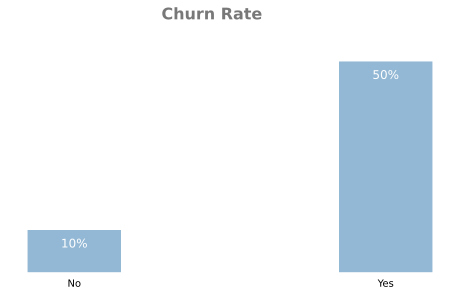

In [114]:

# cores das barra
CINZA1 , CINZA2, CINZA3 = "#CFCDCE", "#A2A1A3", "#787878"
AZUL1, AZUL2 = "#8db7eb", "#253760"

import matplotlib.pyplot as plt
import numpy as np
# configurando parâmetros das fontes
plt.rcParams['font.family'] = 'sans-serif'

%matplotlib inline
%config InlineBackend.figure_format ='svg'

# dados para o grafico
labels =['No','Yes']
antes = [10,50]
depois = [20,30,40,50,60]

# preparando o eixo x e tamanho da barra do grafico
x = np.arange(len(labels))
width_bar = 0.30

# fazendo a figura e o axe
fig, ax = plt.subplots(figsize=(8,4))

# plotando os dois graficos
act1 = plt.bar(x,antes, width_bar,label='antes', color='#93b8d5',bottom= None, align ='center')
#act2 = plt.bar(x + 0.35/2,depois , width_bar,label='depois',color='#335978',bottom= None, align ='center')

# colongando os labels
ax.set_xticks(x)
ax.set_xticklabels(labels);

plt.text(0.28, 60, 'Churn Rate',
         fontsize=16,
         color=CINZA3,
         weight='bold');


# # remover grids e eixos
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# # remover eixo y
plt.gca().axes.get_yaxis().set_visible(False)

# # remover xticks do eixo x
plt.tick_params(
    axis='both',
    which='both',
    bottom=False,
    top=False,
    labelbottom=True)


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(
                    '{}%'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2,  height),
                    xytext=(0, -20),  # offset
                    textcoords="offset points",
                    ha='center',
                    va='bottom',
                    fontsize=12,
                    color="white",
                    )
autolabel(act1)


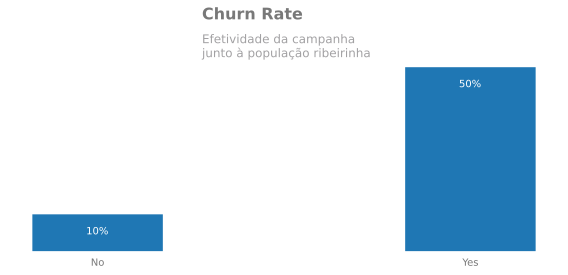

In [139]:
labels =['No','Yes']
depois = [10,50]

fig, ax = plt.subplots(figsize=(8,4))

# ajustes para construir o gráfico
x = np.arange(len(labels))
width_bar = 0.35

# rects_1 = ax.bar(np.array([0,1,2,3,4]) - 0.35/2, antes, 0.35, label='Antes')
# rects_2 = ax.bar(np.array([0,1,2,3,4]) + 0.35/2 , depois, 0.35,label='depois')
# rects1 = ax.bar(x - width_bar/2, antes, width_bar, label='Antes')
# rects2 = ax.bar(x + width_bar/2, depois, width_bar, label='Depois')

# rects1 = ax.bar(labels, antes, width_bar, label='Antes')
# rects2 = ax.bar(labels, depois, width_bar, label='Depois')

# rects1 = ax.bar(x + 0.00 , antes, 0.15, label='antes')
# rects2 = ax.bar(x + 0.15, depois, 0.15,label ='depois')
# rects3 = ax.bar(x + 0.30, depois, 0.15,label ='depois')

#rects1 = ax.bar(x - width_bar/2,antes, width_bar)
#rects2 = ax.bar(x + width_bar/2,depois,width_bar)
rects2 = ax.bar(labels,depois,width_bar)


ax.set_xticks(x)
ax.set_xticklabels(labels,color="#787878");

# # remover grids e eixos
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# # remover eixo y
plt.gca().axes.get_yaxis().set_visible(False)

# # remover xticks do eixo x
plt.tick_params(
    axis='both',
    which='both',
    bottom=False,
    top=False,
    labelbottom=True)


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(
                    '{}%'.format(height),
                    xy=(rect.get_x() ,  height),
                    xytext=(65, -20),  # offset
                    textcoords="offset points",
                    ha='center',
                    #va='bottom',
                    #fontsize=10,
                    color="White",
                    )

# plotar labels dentro das barras
#autolabel(rects1)
autolabel(rects2)

plt.text(0.28, 63, 'Churn Rate',
         fontsize=16,
         color=CINZA3,
         weight='bold');

# plotar subtitulo
plt.text(0.28, 59,
         "Efetividade da campanha\n"
         "junto à população ribeirinha",
         verticalalignment="top",
         fontsize=12,
         color=CINZA2);

# plotar gráfico
fig.tight_layout()
plt.show()



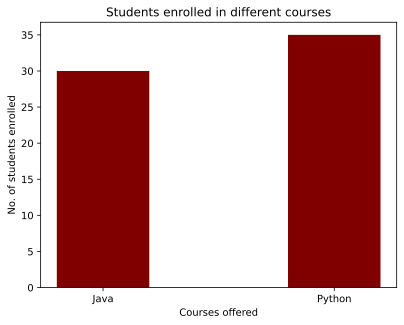

In [131]:
import numpy as np
import matplotlib.pyplot as plt

# creating the dataset
data = {'Java': 30,
        'Python': 35}
courses = list(data.keys())
values = list(data.values())

# creating the bar plot
plt.bar(courses, values, color='maroon',
        width=0.4)

plt.xlabel("Courses offered")
plt.ylabel("No. of students enrolled")
plt.title("Students enrolled in different courses")
plt.show()